In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from skimage.util import random_noise
from tensorflow import keras
from matplotlib.ticker import MaxNLocator

# Q1

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Load data

In [ ]:
# Normalize to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
def create_model():
    inputs = Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return models.Model(inputs, outputs)

model = create_model()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class FeatureMapCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch == 0 or (epoch + 1) % 5 == 0:

            sample_image = x_train[0:1]
            layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
            feature_map_model = models.Model(inputs=model.input, outputs=layer_outputs)
            feature_maps = feature_map_model(sample_image)
            num_layers = min(2, len(feature_maps))

            for i in range(num_layers):
                feature_map = feature_maps[i]
                num_filters = feature_map.shape[-1]
                size = feature_map.shape[1]
                cols = 6
                rows = num_filters // cols + (num_filters % cols > 0)
                fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 1.5))
                axes = axes.flatten()

                for j in range(num_filters):
                    img = feature_map[0, :, :, j].numpy()
                    img -= img.mean()
                    img /= (img.std() + 1e-5)
                    img *= 64
                    img += 128
                    img = np.clip(img, 0, 255).astype('uint8')

                    axes[j].imshow(img, cmap='viridis')
                    axes[j].axis('off')

                for k in range(num_filters, len(axes)):
                    axes[k].axis('off')

                plt.suptitle(f"Feature maps of layer {i + 1} at epoch {epoch + 1}", fontsize=14, y=1.02)
                plt.tight_layout()
                plt.show()

Epoch 1/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3103 - loss: 1.8619

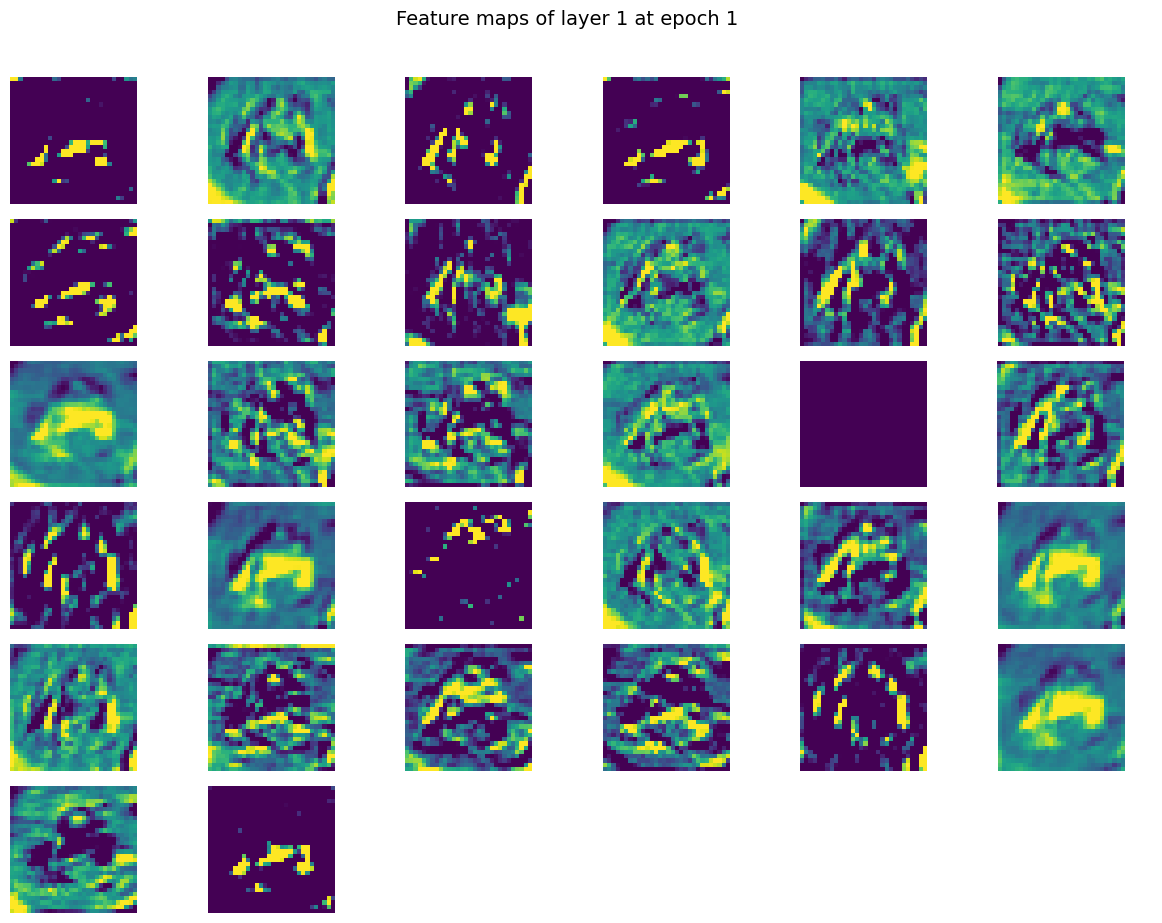

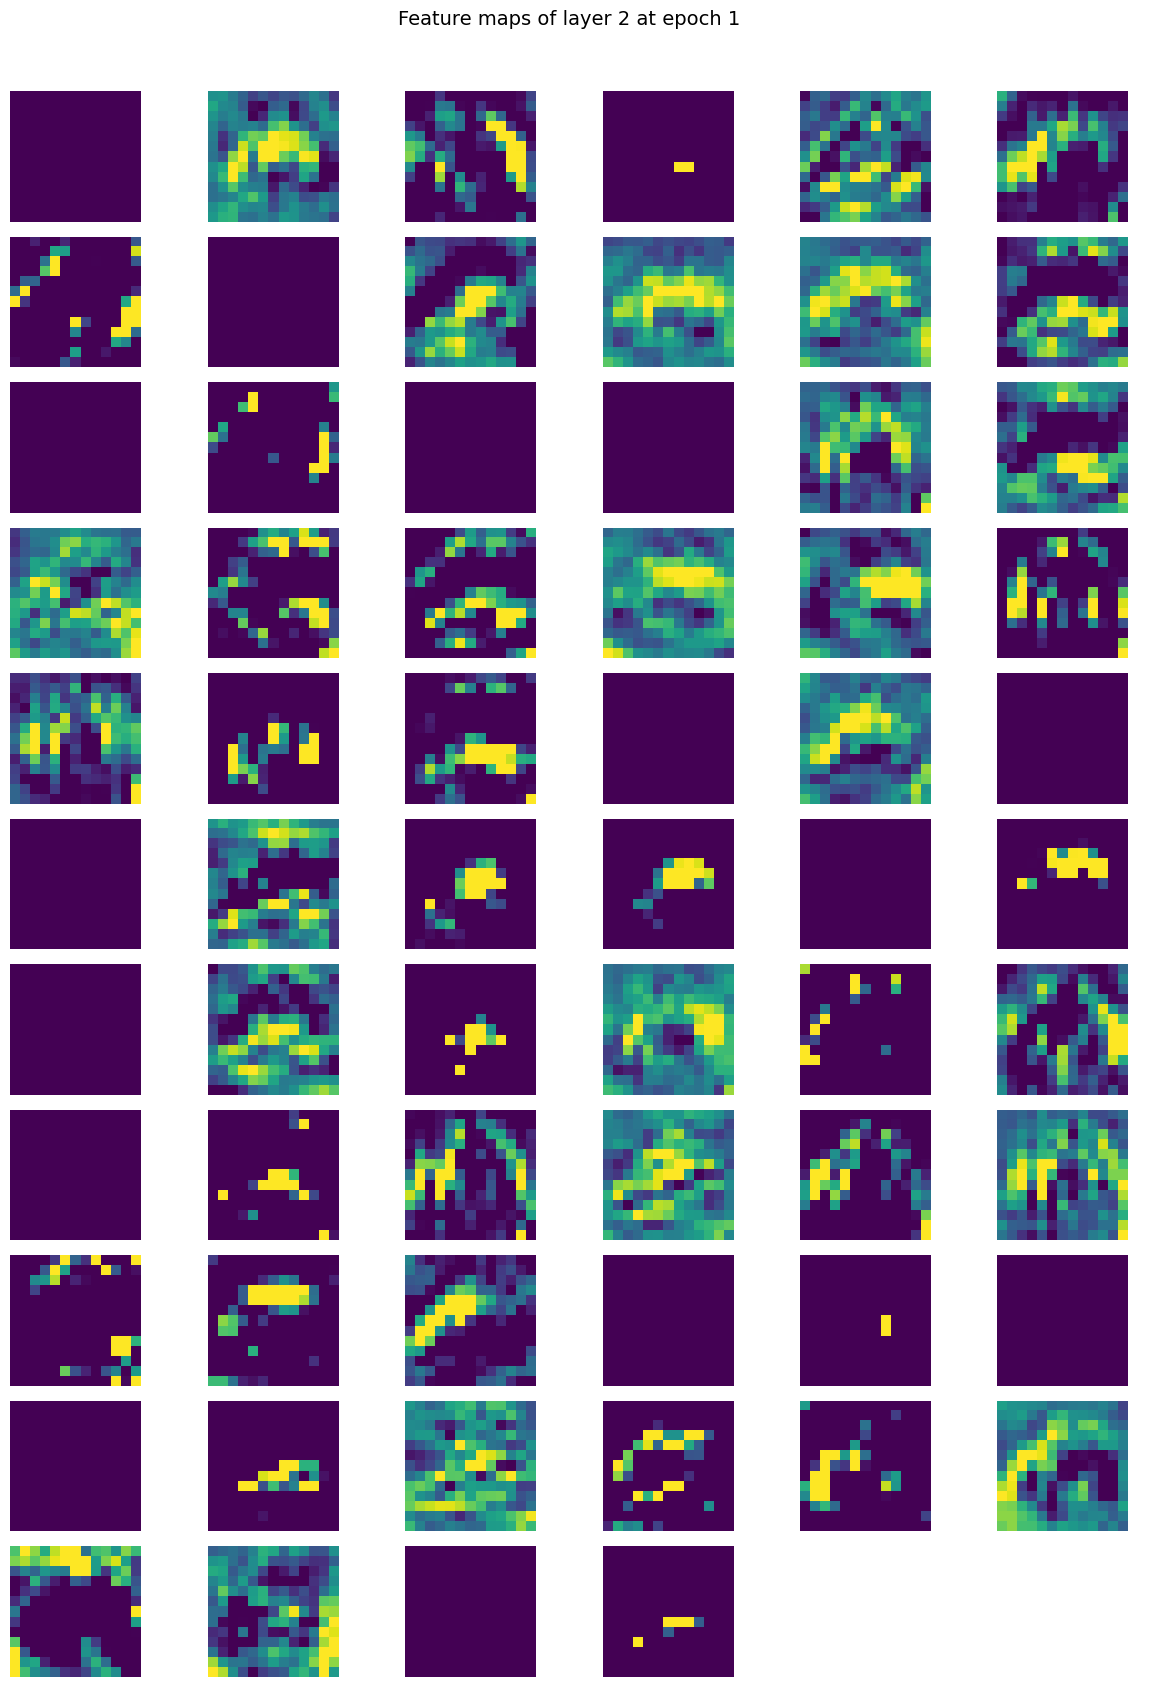

782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.3106 - loss: 1.8613 - val_accuracy: 0.4674 - val_loss: 1.5293
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5323 - loss: 1.3102 - val_accuracy: 0.5828 - val_loss: 1.1806
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6018 - loss: 1.1268 - val_accuracy: 0.6087 - val_loss: 1.1005
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6343 - loss: 1.0362 - val_accuracy: 0.6363 - val_loss: 1.0360
Epoch 5/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6675 - loss: 0.9478

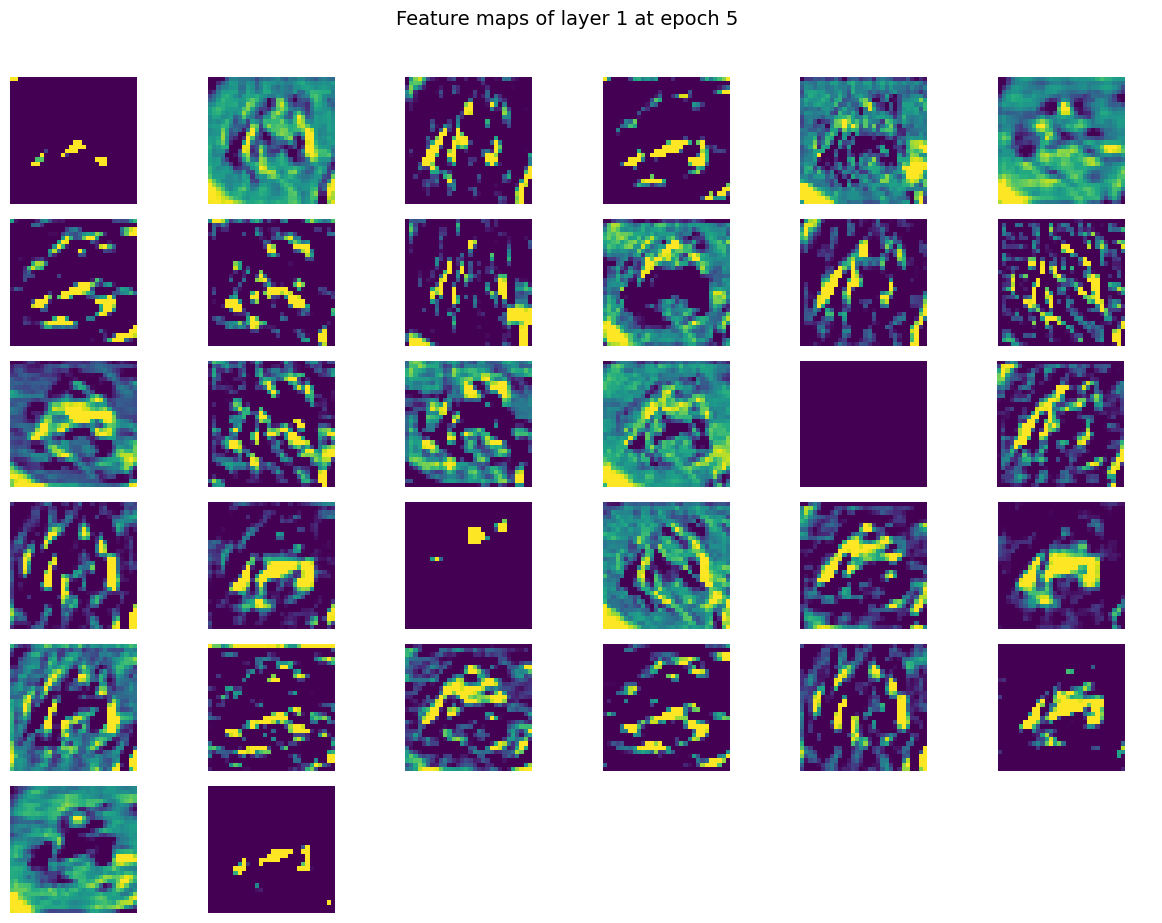

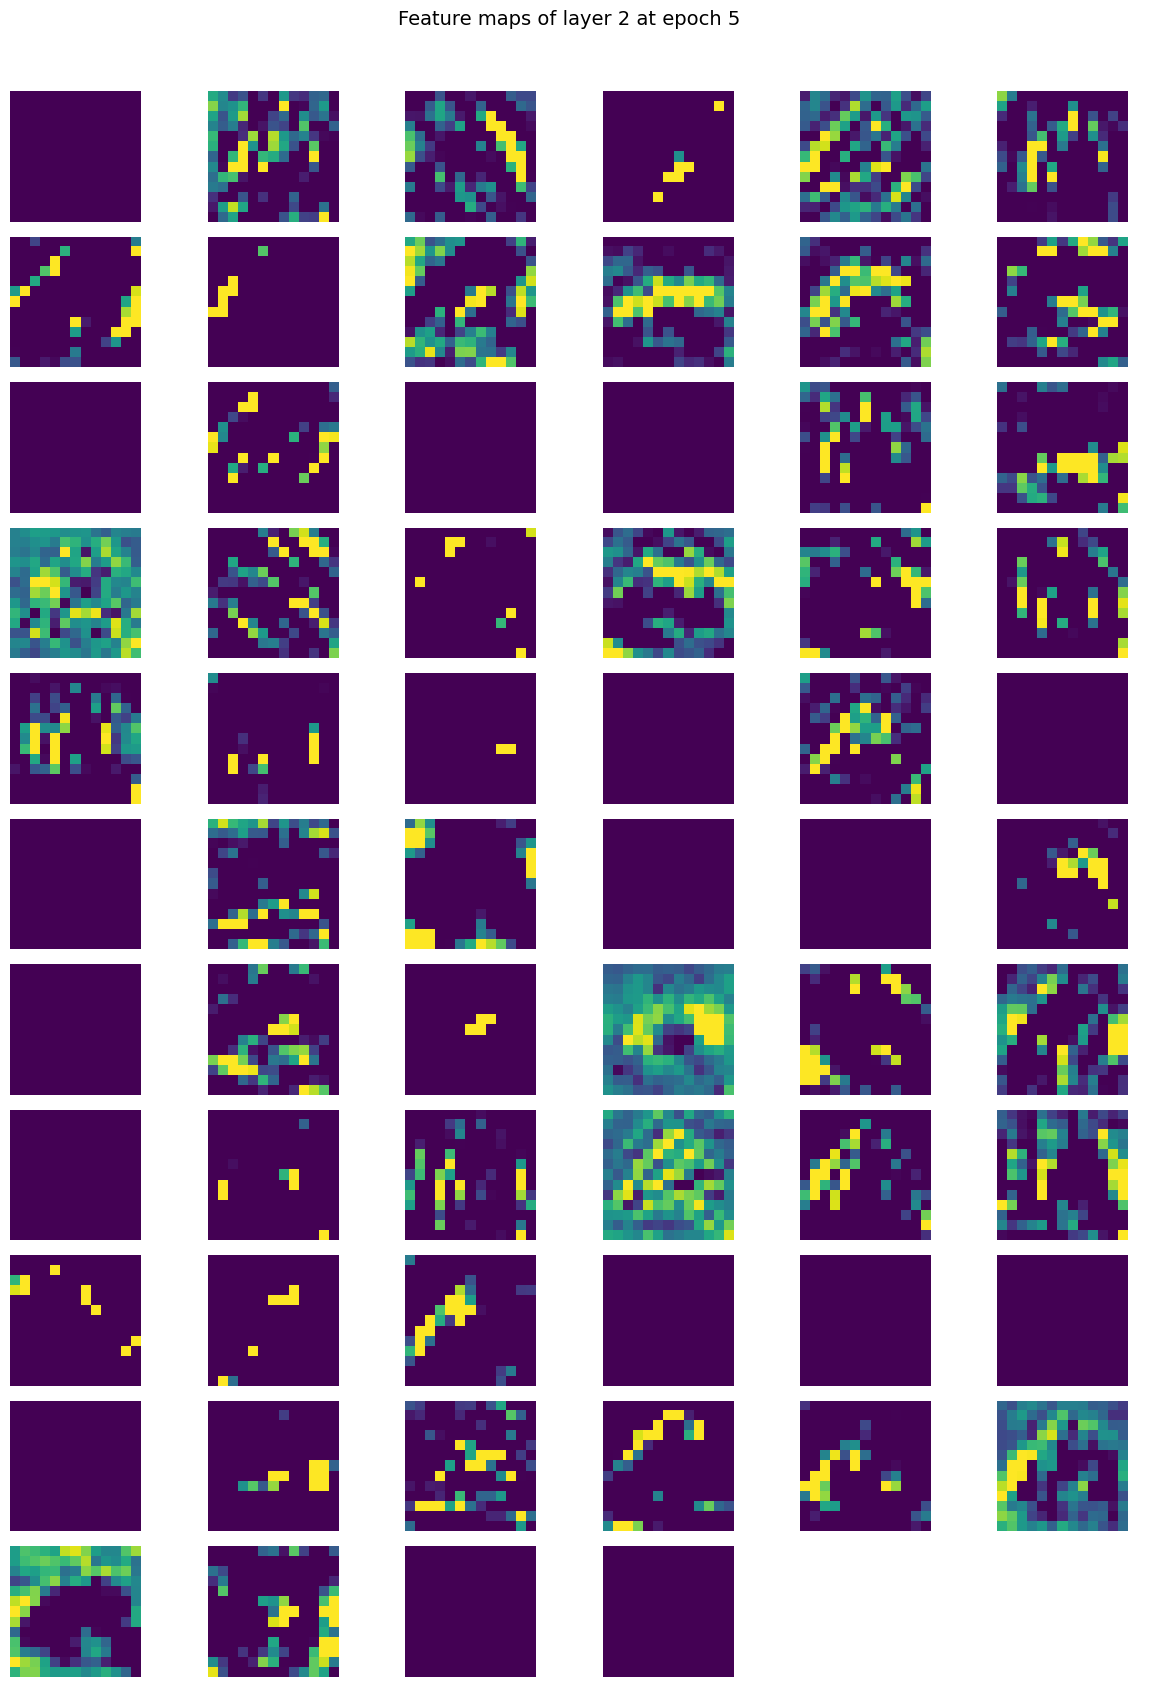

782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.6675 - loss: 0.9478 - val_accuracy: 0.6627 - val_loss: 0.9597
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.6843 - loss: 0.8884 - val_accuracy: 0.6716 - val_loss: 0.9526
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.7045 - loss: 0.8428 - val_accuracy: 0.6836 - val_loss: 0.9268
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 99ms/step - accuracy: 0.7177 - loss: 0.8061 - val_accuracy: 0.6842 - val_loss: 0.9234
Epoch 9/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.7358 - loss: 0.7567 - val_accuracy: 0.6995 - val_loss: 0.8922
Epoch 10/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7478 - loss: 0.7233

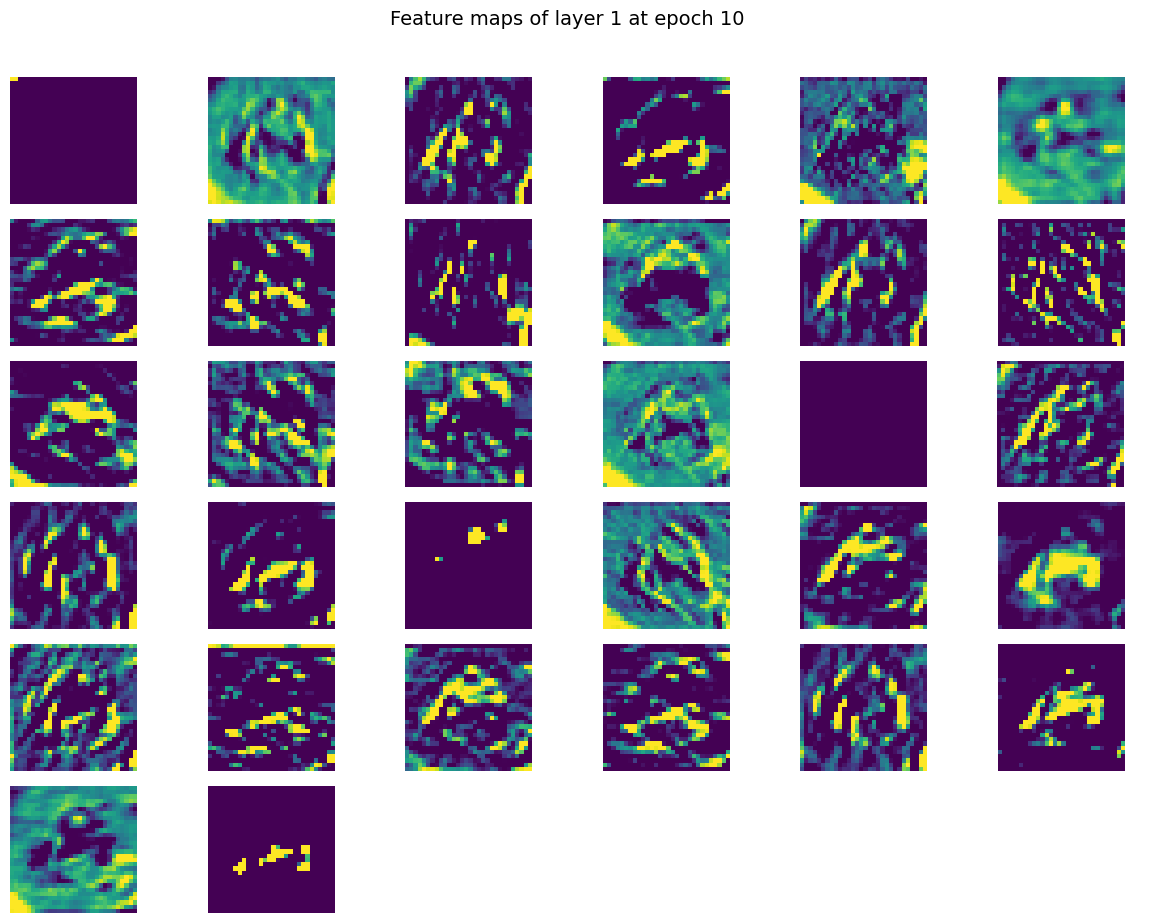

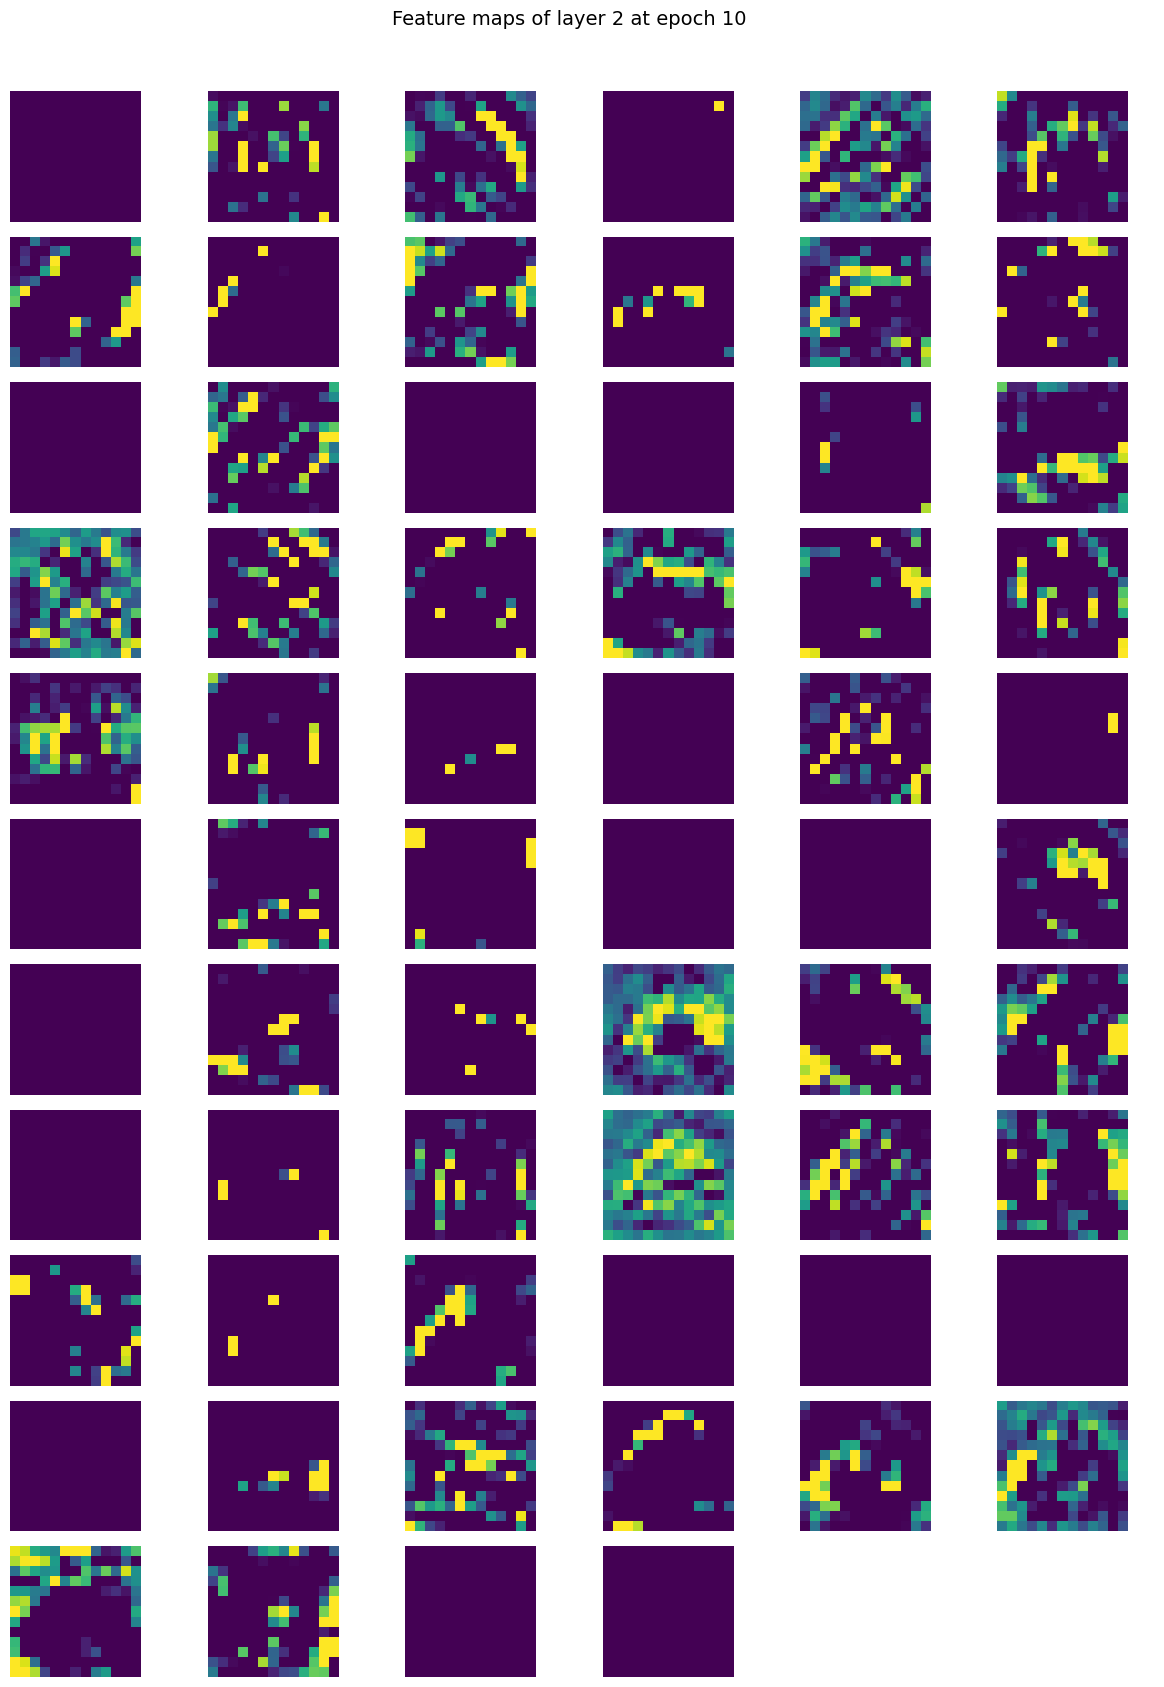

782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7478 - loss: 0.7233 - val_accuracy: 0.6999 - val_loss: 0.8742
Epoch 11/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.7565 - loss: 0.6908 - val_accuracy: 0.7014 - val_loss: 0.8857
Epoch 12/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.7680 - loss: 0.6584 - val_accuracy: 0.7085 - val_loss: 0.8668
Epoch 13/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.7768 - loss: 0.6377 - val_accuracy: 0.7163 - val_loss: 0.8501
Epoch 14/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.7877 - loss: 0.6010 - val_accuracy: 0.7055 - val_loss: 0.9025
Epoch 15/15
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7938 - loss: 0.5800

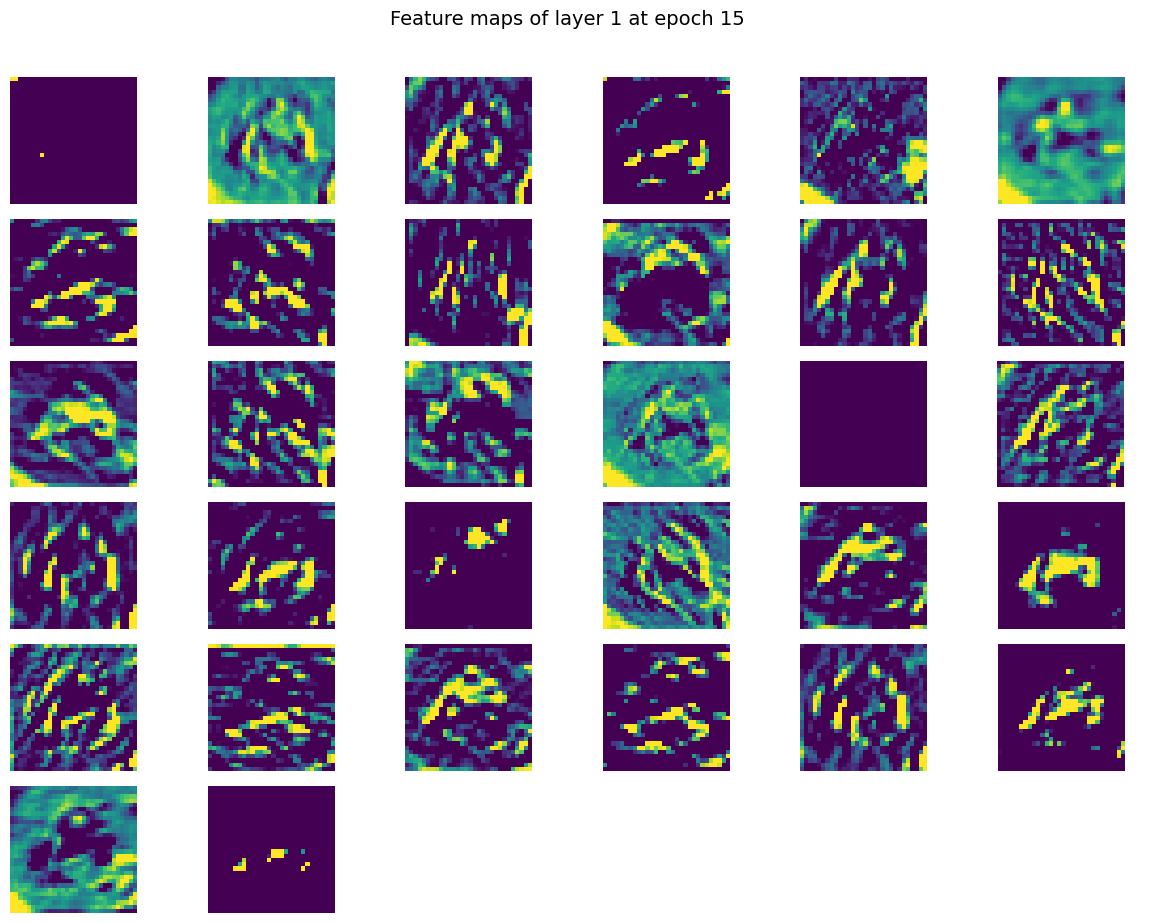

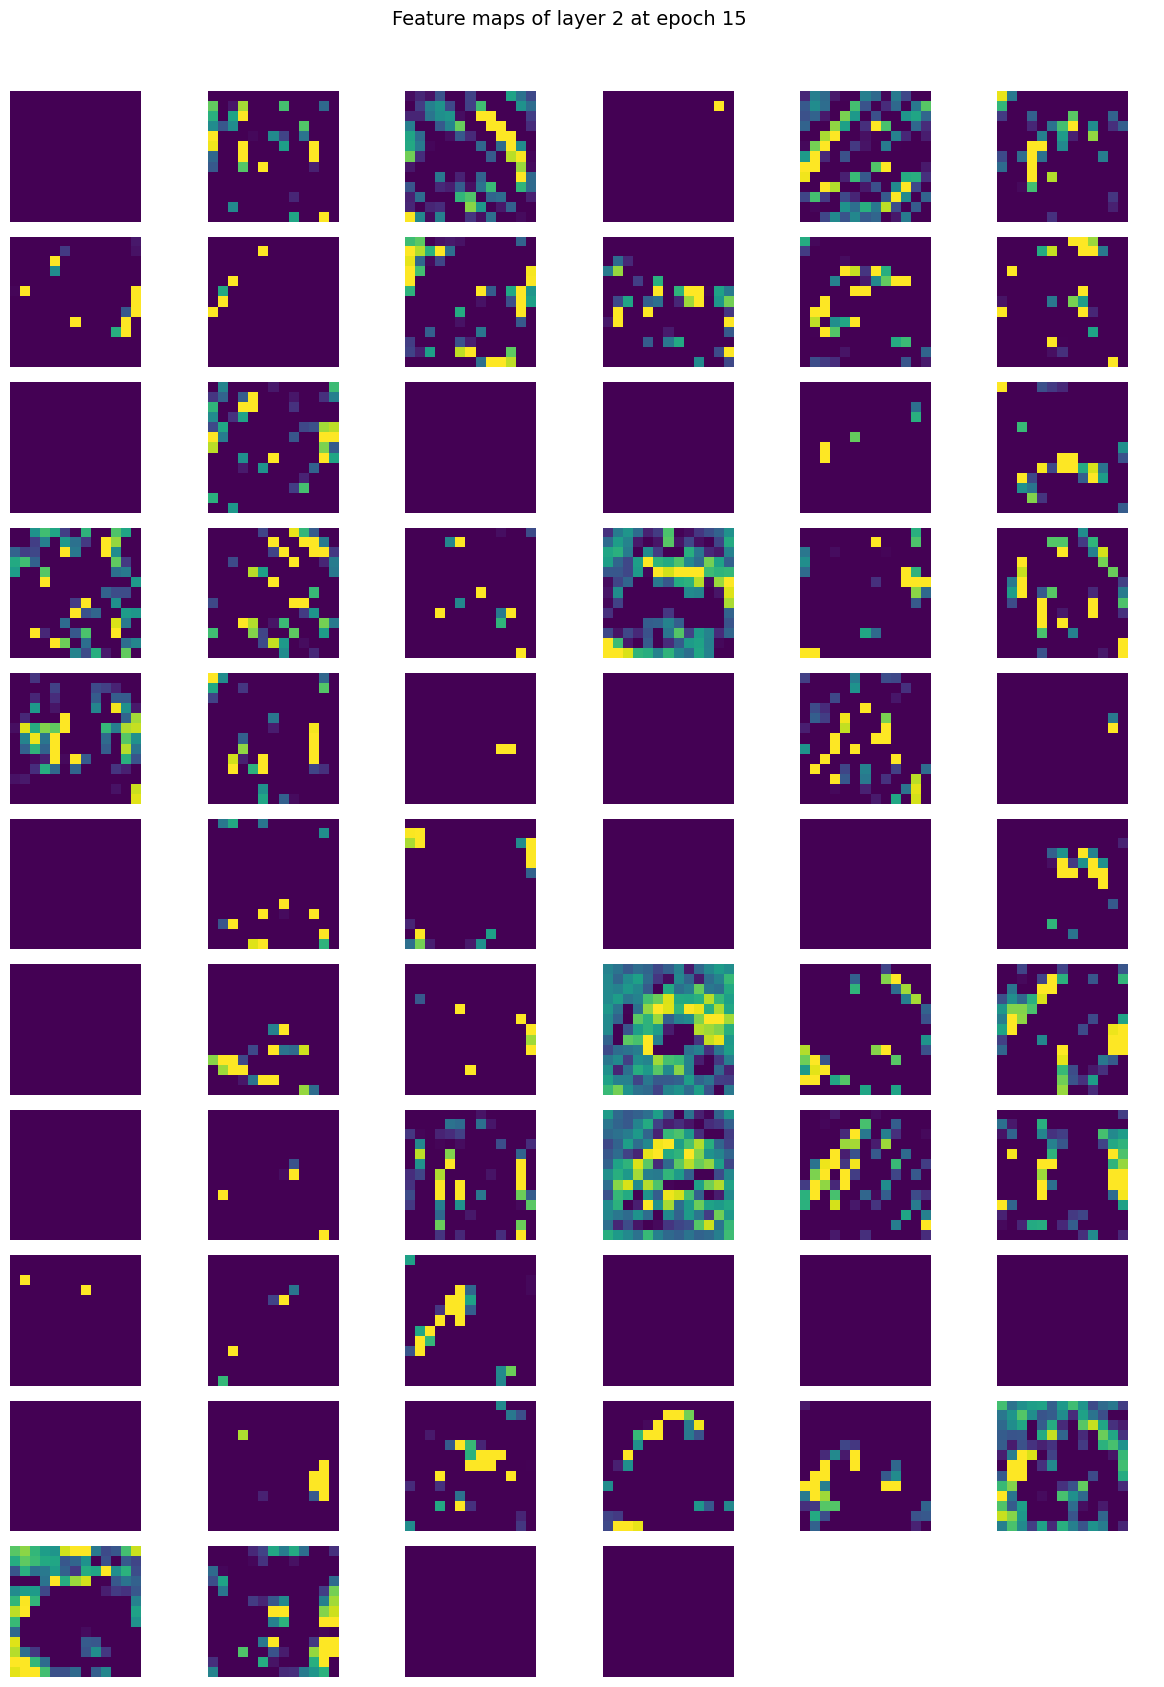

782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.7938 - loss: 0.5800 - val_accuracy: 0.7076 - val_loss: 0.8865


In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), callbacks=[FeatureMapCallback()])

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7169 - loss: 0.8580
Test Loss: 0.8865192532539368, Test Accuracy: 0.7075999975204468


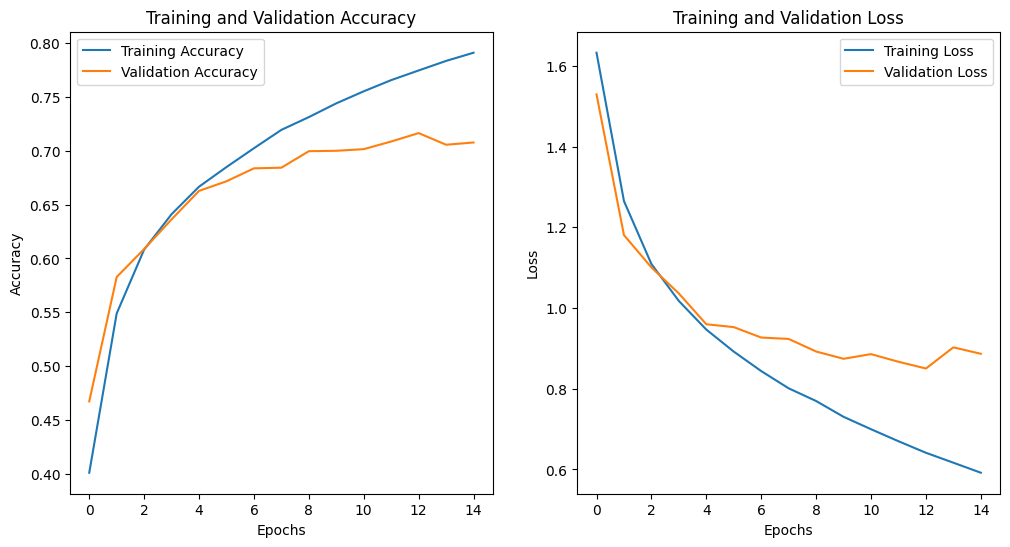

In [ ]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Q2

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data() # Load data

In [ ]:
# Normalize to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# Add Salt and Pepper noise
def add_salt_pepper_noise(images, amount=0.02):
    noisy_images = np.array([random_noise(img, mode='s&p', amount=amount) for img in images])
    return np.clip(noisy_images, 0, 1)

In [ ]:
x_train_noisy = add_salt_pepper_noise(x_train, amount=0.05)
x_test_noisy = add_salt_pepper_noise(x_test, amount=0.05)

In [25]:
def unet_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(c4)
    u1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)

    u2 = layers.UpSampling2D((2, 2))(u1)
    u2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    u3 = layers.UpSampling2D((2, 2))(u2)
    u3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u3)
    u3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u3)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid', padding='same')(u3)
    return keras.Model(inputs, outputs)

model = unet_model((32, 32, 3))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(x_train_noisy, x_train, epochs=5, batch_size=64, validation_data=(x_test_noisy, x_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1255s 2s/step - loss: 0.0387 - val_loss: 0.0186
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1280s 2s/step - loss: 0.0131 - val_loss: 0.0082
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1277s 2s/step - loss: 0.0077 - val_loss: 0.0063
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1248s 2s/step - loss: 0.0063 - val_loss: 0.0055
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1280s 2s/step - loss: 0.0055 - val_loss: 0.0048


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


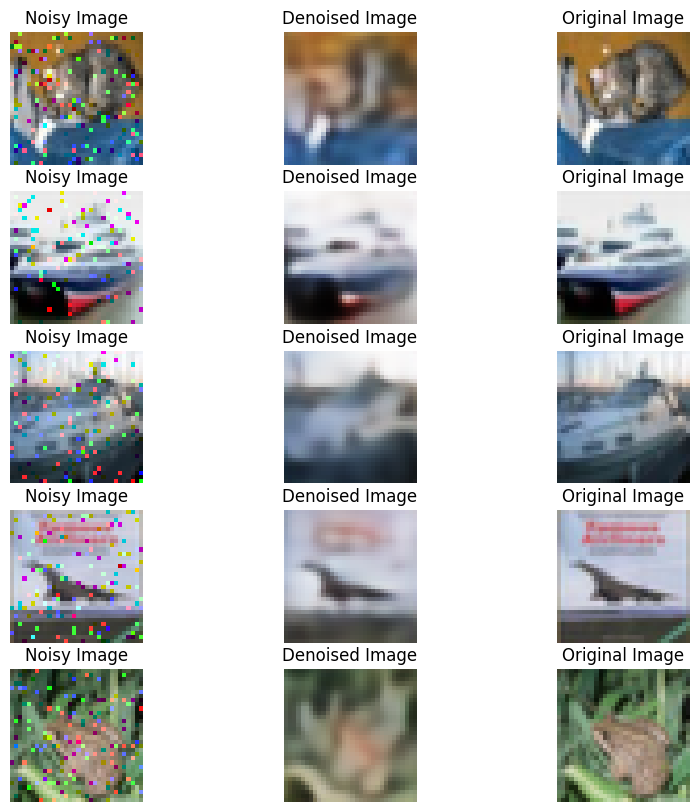

In [20]:
def plot_denoising_results(model, noisy_images, clean_images, num_samples=5):
    predictions = model.predict(noisy_images[:num_samples])
    fig, axes = plt.subplots(num_samples, 3, figsize=(10, num_samples * 2))
    for i in range(num_samples):
        axes[i, 0].imshow(noisy_images[i])
        axes[i, 0].set_title("Noisy Image")
        axes[i, 1].imshow(predictions[i])
        axes[i, 1].set_title("Denoised Image")
        axes[i, 2].imshow(clean_images[i])
        axes[i, 2].set_title("Original Image")
        for ax in axes[i]:
            ax.axis("off")
    plt.show()

plot_denoising_results(model, x_test_noisy, x_test)

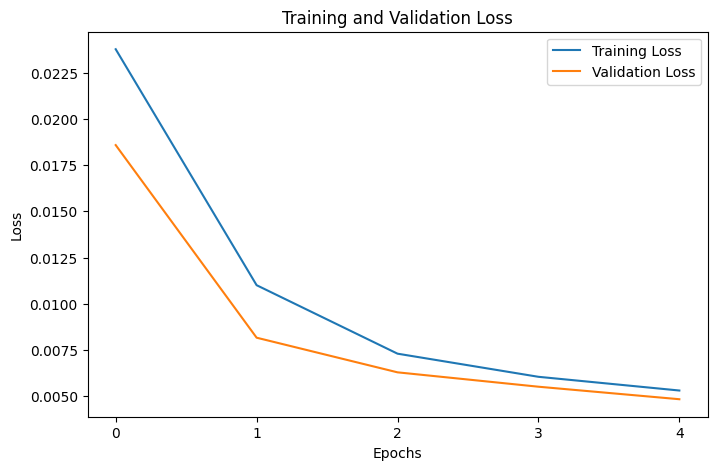

In [24]:
# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()